# TP1 Organización de Datos

## Imports

In [81]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [82]:
sb.set(style="whitegrid")

## Leemos el archivo

In [83]:
train = pd.read_csv('train.csv')
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## Análisis general

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [85]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [86]:
train['keyword'] = train['keyword'].str.replace('%20', ' ')
train['keyword'].value_counts()

fatalities             45
deluge                 42
armageddon             42
harm                   41
body bags              41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: keyword, Length: 221, dtype: int64

In [87]:
train['location'].value_counts()

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
Voorhees, NJ                      1
Roppongi, Minato, Tokyo           1
IN our hearts  Earth Global       1
NY Capital District               1
Somewhere in China.               1
Name: location, Length: 3341, dtype: int64

## Limpiamos los datos para agrupar aquellos que refieren a la misma location pero de distinta forma
Tomamos en cuenta aquellos que tienen más de 10 tweets

In [88]:
train['location'] = train['location'].str.replace('United States', 'USA', case=False)
train['location'] = train['location'].replace('US', 'USA')
train['location'].value_counts().head(40)

USA                  163
New York              71
London                45
Canada                29
Nigeria               28
UK                    27
Los Angeles, CA       26
India                 24
Mumbai                22
California, USA       21
Washington, DC        21
Kenya                 20
Worldwide             19
Chicago, IL           18
Australia             18
California            17
New York, NY          15
Everywhere            15
Florida               14
San Francisco         14
United Kingdom        14
Washington, D.C.      13
Indonesia             13
Los Angeles           13
Ireland               12
NYC                   12
Toronto               12
Chicago               11
Seattle               11
Earth                 11
San Francisco, CA     11
Sacramento, CA        10
Texas                 10
London, England       10
London, UK            10
Atlanta, GA           10
ss                    10
New York City         10
Manchester             9
Nashville, TN          9


In [89]:
train['location'] = train['location'].str.replace('United Kingdom', 'UK', case=False)
train['location'] = train['location'].str.replace('California, USA', 'California', case=False)
train['location'] = train['location'].str.replace('New York, NY', 'New York', case=False)
train['location'] = train['location'].str.replace('New York ,NY', 'New York', case=False)
train['location'] = train['location'].str.replace('New York, USA', 'New York', case=False)
train['location'] = train['location'].str.replace('New York City', 'New York', case=False)
train['location'] = train['location'].str.replace('NYC', 'New York', case=False)
train['location'] = train['location'].str.replace('Washington, D.C.', 'Washington, DC', case=False)
train['location'] = train['location'].str.replace('Los Angeles, CA', 'Los Angeles', case=False)
train['location'] = train['location'].str.replace('London, UK', 'London', case=False)
train['location'] = train['location'].replace('worldwide', 'Worldwide')
train['location'] = train['location'].replace('Denver, Colorado', 'Devnver, CO')
train['location'] = train['location'].replace('Seattle, WA', 'Seattle')
train['location'] = train['location'].str.replace('Earth', 'Worldwide', case=False)
train['location'] = train['location'].str.replace('Everywhere', 'Worldwide', case=False)
train['location'].value_counts().head(40)

USA                  163
New York             118
Worldwide             57
London                56
UK                    41
Los Angeles           41
California            38
Washington, DC        35
Canada                29
Nigeria               28
India                 24
Mumbai                22
Kenya                 20
Australia             18
Chicago, IL           18
Seattle               18
San Francisco         14
Florida               14
Indonesia             13
Ireland               12
Toronto               12
San Francisco, CA     11
Chicago               11
Sacramento, CA        10
Atlanta, GA           10
ss                    10
Texas                 10
London, England       10
304                    9
Nashville, TN          9
Dallas, TX             9
Manchester             9
Devnver, CO            9
San Diego, CA          9
World                  9
South Africa           8
Scotland               8
Houston, TX            8
Memphis, TN            7
Austin, TX             7


In [90]:
train['location'] = train['location'].str.replace('San Francisco, CA', 'San Francisco', case=False)
train['location'] = train['location'].str.replace('London, England', 'London', case=False)
train['location'] = train['location'].str.replace('Chicago, IL', 'Chicago', case=False)
train['location'] = train['location'].replace('World', 'Worldwide')
train['location'].value_counts().head(50)

USA                               163
New York                          118
Worldwide                          66
London                             66
Los Angeles                        41
UK                                 41
California                         38
Washington, DC                     35
Chicago                            30
Canada                             29
Nigeria                            28
San Francisco                      25
India                              24
Mumbai                             22
Kenya                              20
Seattle                            18
Australia                          18
Florida                            14
Indonesia                          13
Toronto                            12
Ireland                            12
Texas                              10
ss                                 10
Atlanta, GA                        10
Sacramento, CA                     10
Manchester                          9
Devnver, CO 

In [91]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [92]:
train['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [93]:
ordenado_t = train.sort_values('text')
ordenado_t
i = 650
while i < 700 :
    print (i)
    print (ordenado_t['text'].iloc[i])
    i += 1

650
1) 'Investigators say a Virgin Galactic spaceship crash was caused by structural failure after the co-pilot unlocked a braking system early'
651
1-6 TIX Calgary Flames vs COL Avalanche Preseason 9/29 Scotiabank Saddledome http://t.co/5G8qA6mPxm
652
1.3 #Earthquake in 9Km Ssw Of Anza California #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK
653
1.43 earthquake occurred near Mount St. Helens area Washington at 09:36 UTC! #earthquake http://t.co/2xMdiDGpnr
654
1.9 #Earthquake in 5Km S Of Volcano Hawaii #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK
655
1.9 earthquake occurred 15km E of Anchorage Alaska at 00:11 UTC! #earthquake #Anchorage http://t.co/QFyy5aZIFx
656
1.94 earthquake occurred 5km S of Volcano Hawaii at 01:04 UTC! #earthquake #Volcano http://t.co/auf4J4Owj1
657
1/2 of the deaths in red-light running crashes are pedestrians bicyclists &amp; other vehicle occupants that are hit by the red-light ru

In [94]:
ordenado_t.iloc[666]

id                                                       5127
keyword                                                 fatal
location                                             Varanasi
text        11-Year-Old Boy Charged With Manslaughter of T...
target                                                      1
Name: 3589, dtype: object

In [95]:
top_keyword = ordenado_t[ordenado_t['keyword'] == 'fatal']
top_keyword.head(12)

,id,keyword,location,text,target
3609,5152,fatal,NaN,#news #crimes Police ID victim in fatal crash ...,1
3589,5127,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of T...,1
3578,5113,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3613,5157,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3597,5137,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3600,5140,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3603,5144,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1
3604,5145,fatal,Bangalore,11-Year-Old Boy Charged With Manslaughter of T...,1
3610,5153,fatal,Dimapur,11-Year-Old Boy Charged With Manslaughter of T...,1
3614,5159,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of T...,1


In [96]:
train['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [97]:
top_keyword = train[train['keyword'] == 'fatalities']
top_keyword

,id,keyword,location,text,target
3616,5162,fatalities,NaN,EXCLUSIVE: In 179 fatalities involving on-duty...,1
3617,5164,fatalities,New York,#NYC #News Legionnaires death toll rises to 8 ...,1
3618,5165,fatalities,"New York ,NY",Let's fraction the vital need for Our fataliti...,0
3619,5166,fatalities,NaN,Las Vegas in top 5 cities for red-light runnin...,0
3620,5168,fatalities,"Corpus Christi, Texas",We are totally unprepared for an EMP attack. B...,1
3621,5169,fatalities,Cape Town,City implores motorists not to speed after mor...,1
3622,5170,fatalities,NaN,@kyrikoni @ExpressandStar Who said veg and fru...,0
3623,5171,fatalities,Wolverhampton/Brum/Jersey,Understand that there are no fatalities as no ...,1
3624,5172,fatalities,"Chamblee, Georgia",As of the 6-month mark there were a total of 6...,1
3625,5174,fatalities,Official Website,#HSE releases annual workplace facilities data...,0


## Correlaciones

### Buscamos alguna relación entre el largo de los Tweets y con su veracidad

In [98]:
pos_col_text = train.columns.get_loc('text')+1
train.insert(loc=pos_col_text, column='len_text', value=train['text'].iloc[:].str.len())
train.head(5)

,id,keyword,location,text,len_text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,1


In [99]:
train['len_text'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: len_text, dtype: float64

In [100]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

### Plots

Text(0, 0.5, 'Cantidad')

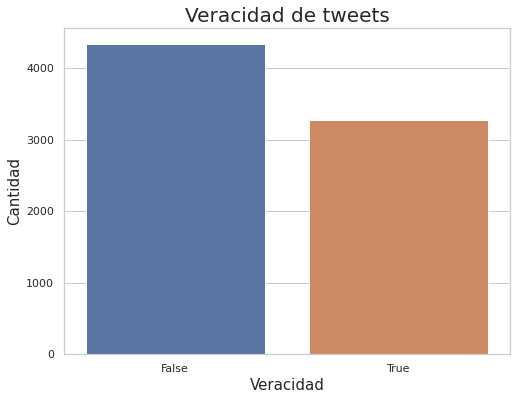

In [101]:
plt.figure(figsize=(8, 6))
sb.countplot(x=train['target'] == 1)
plt.title("Veracidad de tweets", fontsize=20)
plt.xlabel("Veracidad", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

Text(0, 0.5, 'Cantidad')

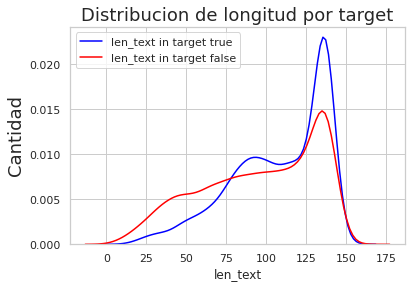

In [102]:
g1 = sb.distplot(train[train['target'] == 1]['len_text'], color="blue", label='len_text in target true', hist=False)
g1 = sb.distplot(train[train['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud por target", fontsize=18)
g1.set_ylabel("Cantidad", fontsize=18)

Text(0, 0.5, 'Longitud (cantidad de caracteres)')

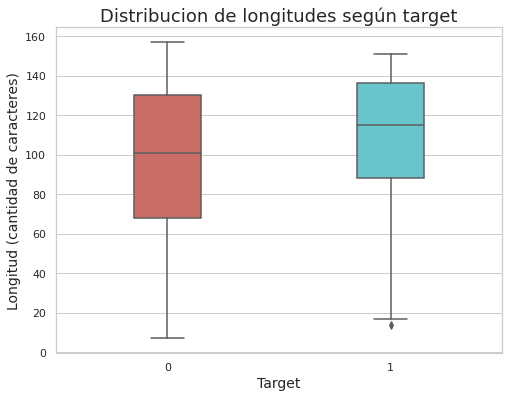

In [103]:
plt.figure(figsize=(8,6))
g = sb.boxplot(x="target", y="len_text", data=train, palette="hls", width=0.3)
g.set_title("Distribucion de longitudes según target", fontsize=18)
g.set_xlabel("Target", fontsize=14)
g.set_ylabel("Longitud (cantidad de caracteres)", fontsize=14)

In [104]:
top_keyword['target'].value_counts()

1    26
0    19
Name: target, dtype: int64

Text(0, 0.5, 'Cantidad')

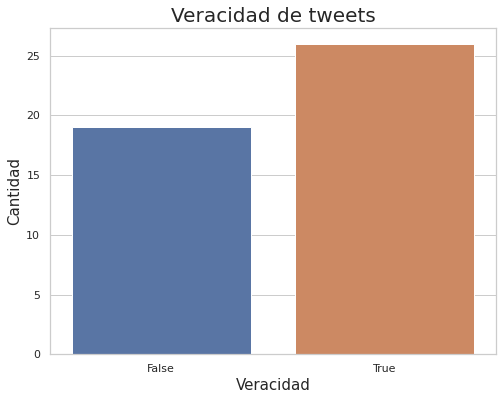

In [162]:
plt.figure(figsize=(8, 6))
sb.countplot(x=top_keyword['target'] == 1)
plt.title("Veracidad de tweets", fontsize=20)
plt.xlabel("Veracidad", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

In [105]:
top_keyword['location'].value_counts()

Washington, DC & Charlotte, NC    1
Avon, OH                          1
Philadelphia, PA                  1
St. John's, NL, Canada            1
Hope Road, Jamaica                1
Official Website                  1
TechFish                          1
#WashingtonState #Seattle         1
WestEnd, Puritan Ave              1
Wisconsin                         1
Lima, Ohio                        1
Nantes, France                    1
Vancouver BC                      1
Just Happy to Be Anywhere         1
New York ,NY                      1
Washington, DC                    1
Caserta-Roma, Italy               1
The North                         1
oman muscat al seeb               1
San Francisco                     1
Corpus Christi, Texas             1
jersey                            1
Wolverhampton/Brum/Jersey         1
USA                               1
Chamblee, Georgia                 1
Ireland                           1
Jogja, Indonesia Slowly Asia      1
Pekanbaruå¡Batam Islandå¡Med

### Buscamos relacion entre la zona y la veracidad

In [106]:
true = train[train['target'] == 1]
true

,id,keyword,location,text,len_text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,1
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,1


In [107]:
true['keyword'].value_counts()

wreckage      39
outbreak      39
derailment    39
oil spill     37
typhoon       37
              ..
blazing        1
epicentre      1
body bag       1
body bags      1
ruin           1
Name: keyword, Length: 220, dtype: int64

Text(0, 0.5, 'Cantidad')

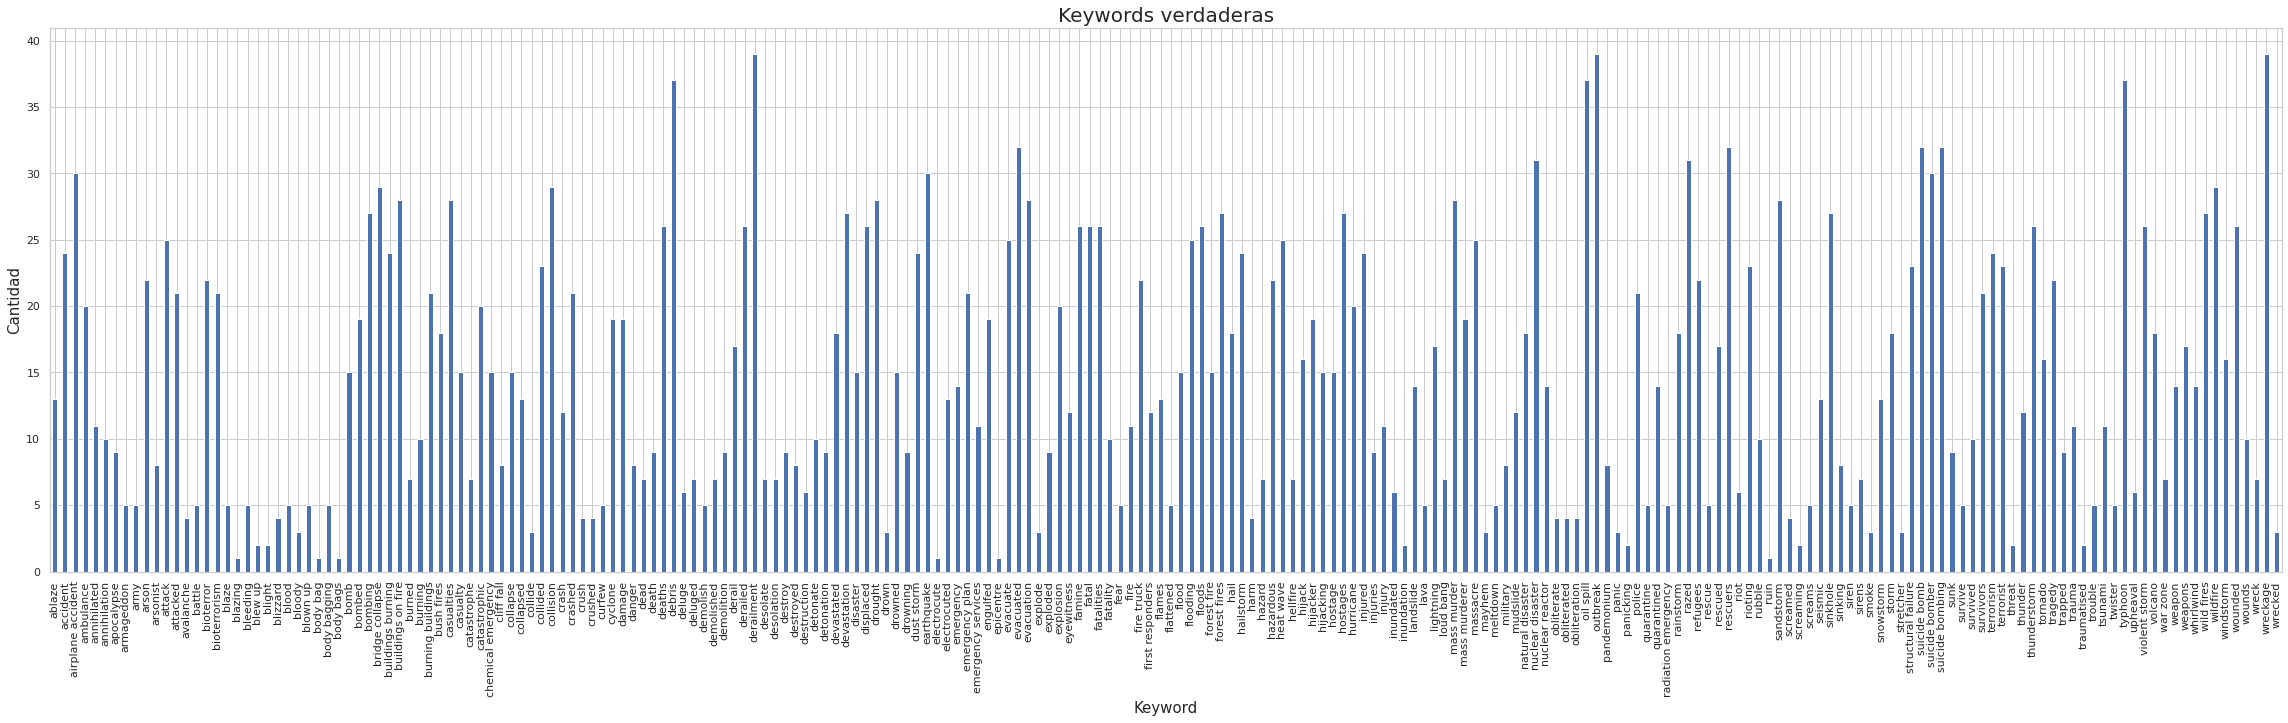

In [171]:
true['keyword'].value_counts().sort_index().plot(kind='bar', figsize=(40,10))
plt.title("Keywords verdaderas", fontsize=20)
plt.xlabel("Keyword", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

In [109]:
false = train[train['target'] == 0]
false

,id,keyword,location,text,len_text,target
15,23,NaN,NaN,What's up man?,14,0
16,24,NaN,NaN,I love fruits,13,0
17,25,NaN,NaN,Summer is lovely,16,0
18,26,NaN,NaN,My car is so fast,17,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,28,0
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,104,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,80,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,127,0
7587,10841,NaN,NaN,Sirens everywhere!,18,0


In [110]:
false['keyword'].value_counts()

body bags          40
harm               37
armageddon         37
deluge             36
wrecked            36
                   ..
suicide bomber      1
typhoon             1
outbreak            1
oil spill           1
suicide bombing     1
Name: keyword, Length: 218, dtype: int64

Text(0, 0.5, 'Cantidad')

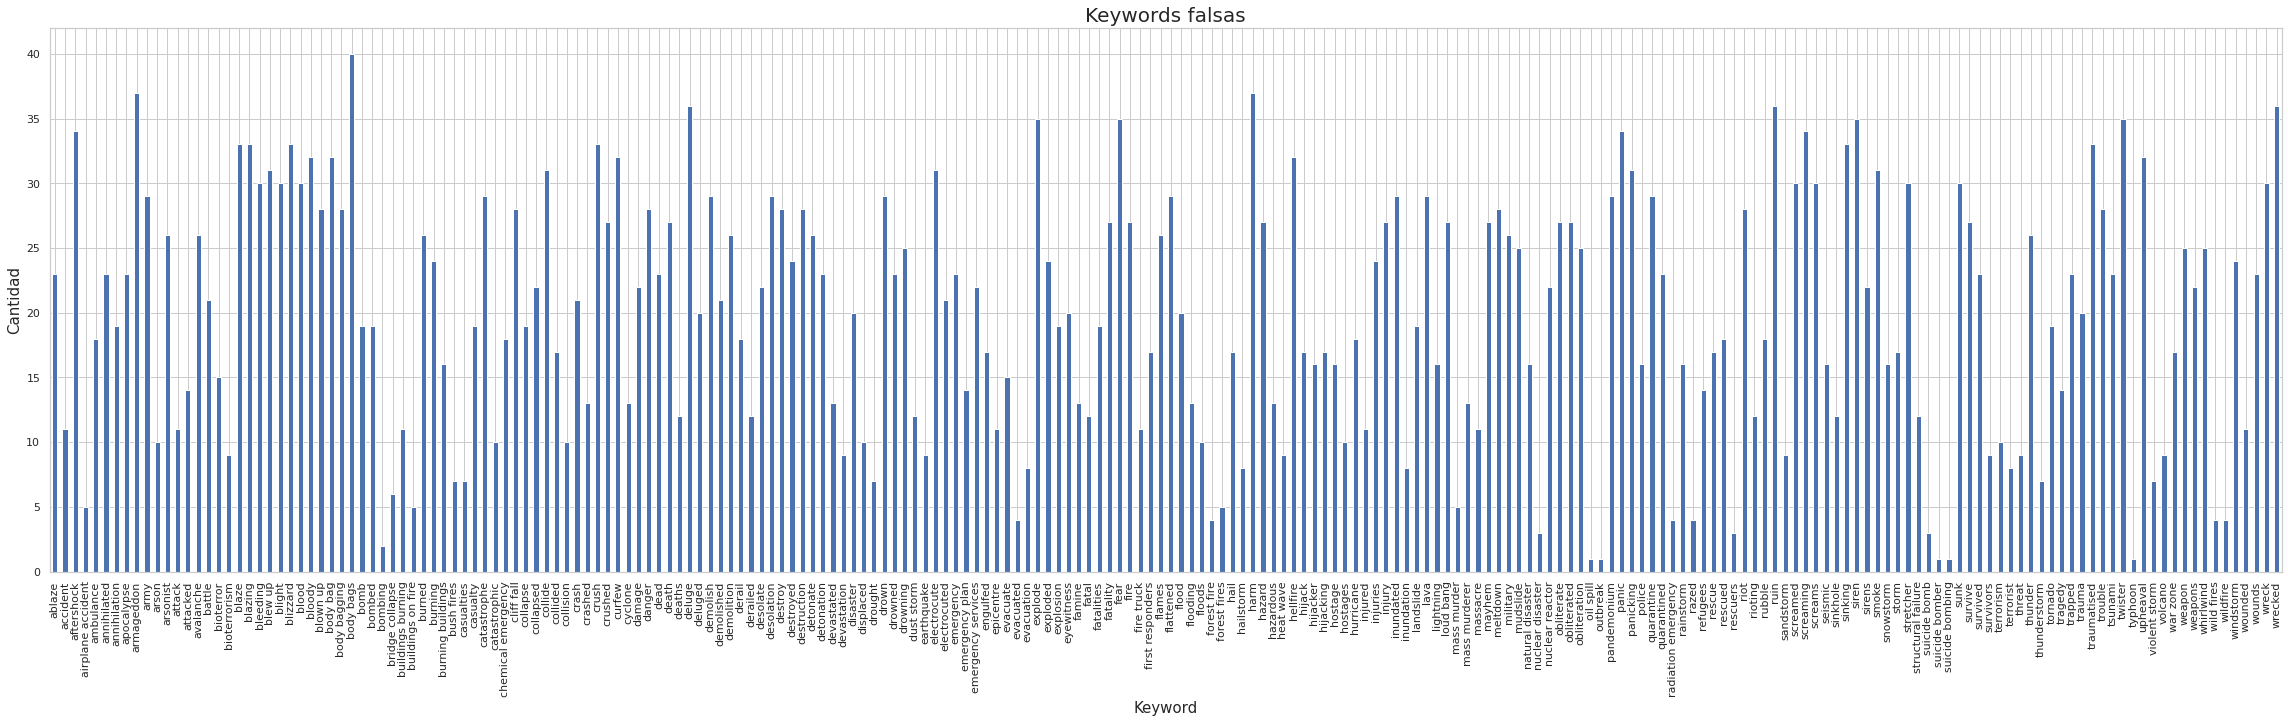

In [172]:
false['keyword'].value_counts().sort_index().plot(kind='bar', figsize=(40,10))
plt.title("Keywords falsas", fontsize=20)
plt.xlabel("Keyword", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

In [161]:
#g = sb.scatterplot(x = "keyword", y = "len_text", data = train)
#g.set_title("len vs target", fontsize=18)

In [113]:
top_location = train[train['location'] == 'USA']
top_location['target'].value_counts()

1    100
0     63
Name: target, dtype: int64

In [114]:
top_location['keyword'].value_counts()

sandstorm           22
destroyed            7
flood                6
hazardous            5
hail                 5
                    ..
natural disaster     1
famine               1
demolished           1
engulfed             1
landslide            1
Name: keyword, Length: 93, dtype: int64

Text(0, 0.5, 'Cantidad')

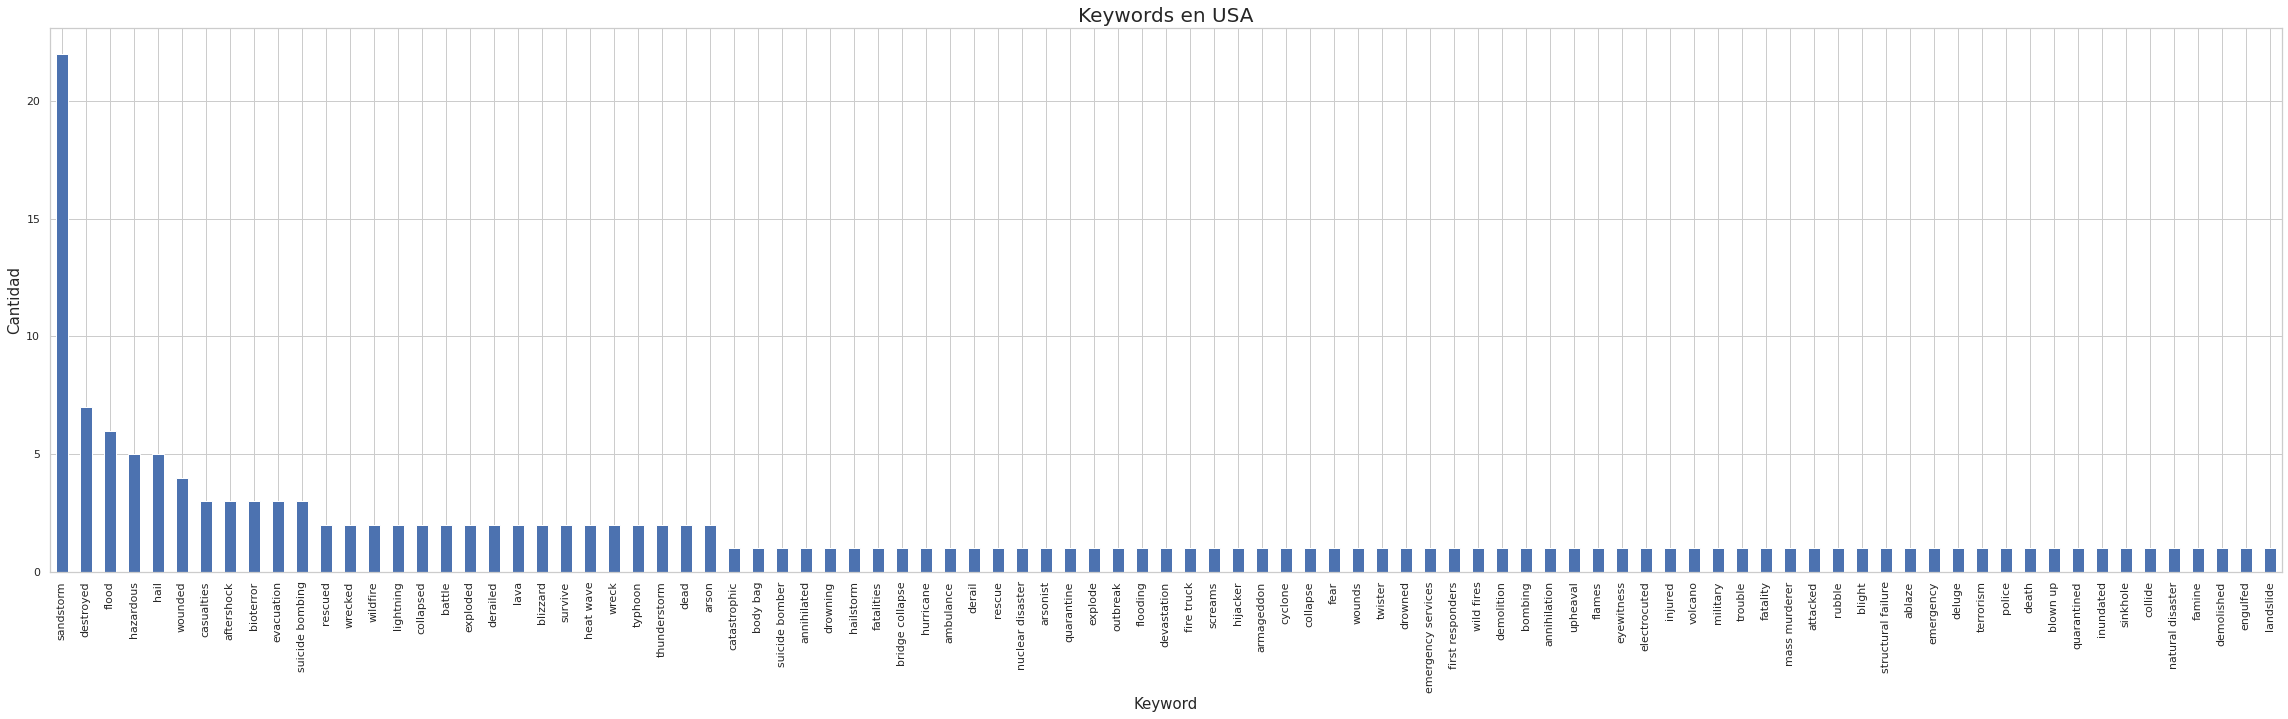

In [173]:
top_location['keyword'].value_counts().plot(kind='bar', figsize=(40,10))
plt.title("Keywords en USA", fontsize=20)
plt.xlabel("Keyword", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

Text(0, 0.5, 'Cantidad')

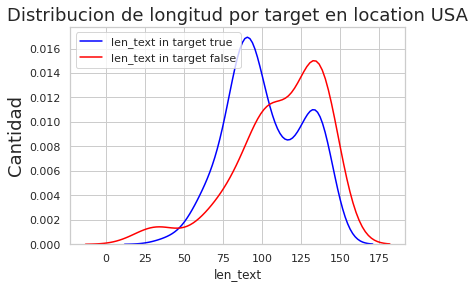

In [116]:
g1 = sb.distplot(top_location[top_location['target'] == 1]['len_text'], color="blue", label='len_text in target true', hist=False)
g1 = sb.distplot(top_location[top_location['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud por target en location USA", fontsize=18)
g1.set_ylabel("Cantidad", fontsize=18)

Text(0, 0.5, 'Largo tweet')

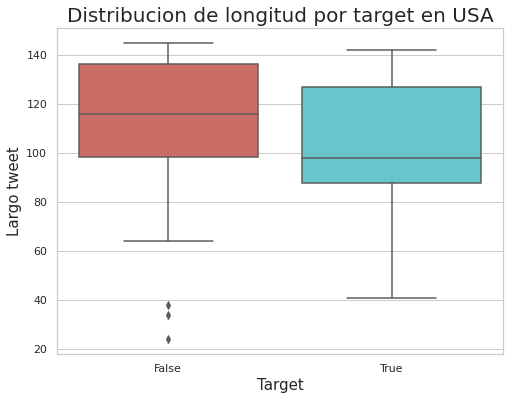

In [117]:
plt.figure(figsize=(8,6))
g = sb.boxplot(x="target", y="len_text", 
                     data=top_location, palette="hls")
plt.xticks(top_location['target'], ['True', 'False'])
g.set_title("Distribucion de longitud por target en USA", fontsize=20)
g.set_xlabel("Target", fontsize=15)
g.set_ylabel("Largo tweet", fontsize=15)

Text(0, 0.5, 'Porcentaje')

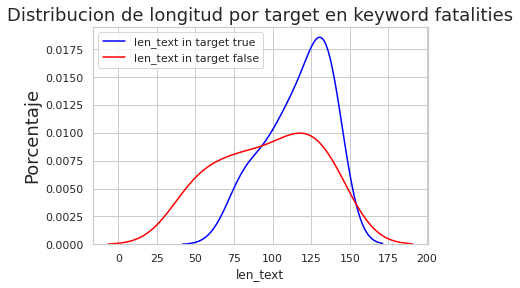

In [118]:
top_keyword = train[train['keyword'] == 'fatalities']
g1 = sb.distplot(top_keyword[top_keyword['target'] == 1]['len_text'], color="blue", label='len_text in target true', hist=False)
g1 = sb.distplot(top_keyword[top_keyword['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud por target en keyword fatalities", fontsize=18)
g1.set_ylabel("Porcentaje", fontsize=18)

Text(0, 0.5, 'len_text')

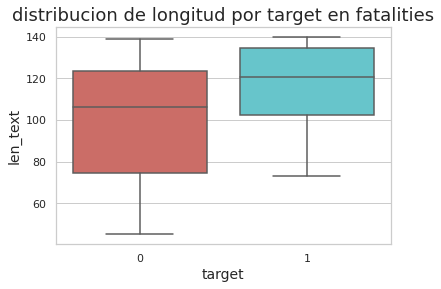

In [119]:
g = sb.boxplot(x="target", y="len_text", 
                     data=top_keyword, palette="hls")
g.set_title("distribucion de longitud por target en fatalities", fontsize=18)
g.set_xlabel("target", fontsize=14)
g.set_ylabel("len_text", fontsize=14)

In [120]:
true['location'].value_counts()

USA                           100
New York                       34
Worldwide                      33
Washington, DC                 24
London                         23
                             ... 
T-Ville                         1
Dakar                           1
Worcester, MA                   1
Beirut, Lebanon                 1
Providence RI / Lisnaskea       1
Name: location, Length: 1486, dtype: int64

In [121]:
false['location'].value_counts()

New York              84
USA                   63
London                43
Worldwide             33
Los Angeles           26
                      ..
A Hoop Somewhere       1
brooklyn, New York     1
ayr                    1
HOMRA.                 1
Island Lake, IL        1
Name: location, Length: 2111, dtype: int64

#### Corrección en location

In [122]:
train['location'] = train['location'].replace('M!$$!$$!PP!', 'Mississippi')

### Agrupamos por location

In [123]:
grouped_by_location = train.groupby(['location']).agg({'target': ['sum', 'count']})
top_10_location_target = grouped_by_location['target'].nlargest(10, 'sum')
top_10_location_target

,sum,count
location,,
USA,100,163
New York,34,118
Worldwide,33,66
"Washington, DC",24,35
London,23,66
Nigeria,22,28
India,20,24
UK,20,41
Mumbai,19,22


In [124]:
grouped_by_location[grouped_by_location[('target', 'count')] >= 8]

target      
                  sum count
location                   
304                 0     9
Atlanta, GA         5    10
Australia           9    18
California         16    38
Canada             13    29
Chicago            13    30
Dallas, TX          3     9
Devnver, CO         6     9
Florida             3    14
Houston, TX         4     8
India              20    24
Indonesia           8    13
Ireland             6    12
Kenya               5    20
London             23    66
Los Angeles        15    41
Manchester          2     9
Mumbai             19    22
Nashville, TN       7     9
New York           34   118
Nigeria            22    28
Sacramento, CA      7    10
San Diego, CA       3     9
San Francisco      13    25
Scotland            4     8
Seattle             7    18
South Africa        2     8
Texas               3    10
Toronto             7    12
UK                 20    41
USA               100   163
Washington, DC     24    35
Worldwide          33    66
ss                  1    10

### Top 10 location vs target

In [125]:
countries = ['USA', 'Australia', 'Canada', 'India', 'Indonesia', 'Ireland', 'Kenya', 'Nigeria', 'UK', 'Scotland', 'South Africa']
grouped_by_country = grouped_by_location.loc[countries]
top_10_countries = grouped_by_country.nlargest(10, ('target', 'count'))
top_10_countries

target      
             sum count
location              
USA          100   163
UK            20    41
Canada        13    29
Nigeria       22    28
India         20    24
Kenya          5    20
Australia      9    18
Indonesia      8    13
Ireland        6    12
Scotland       4     8

Text(0, 0.5, 'Total Tweets')

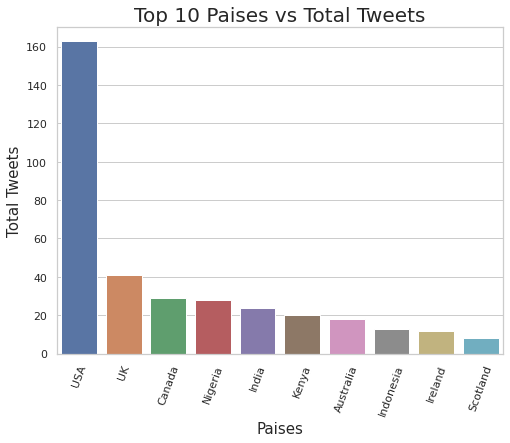

In [126]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_countries.index, y=top_10_countries[('target', 'count')])
plt.ylim(0, 170)
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Total Tweets", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Total Tweets", fontsize=15)

Text(0, 0.5, 'Tweets verdaderos')

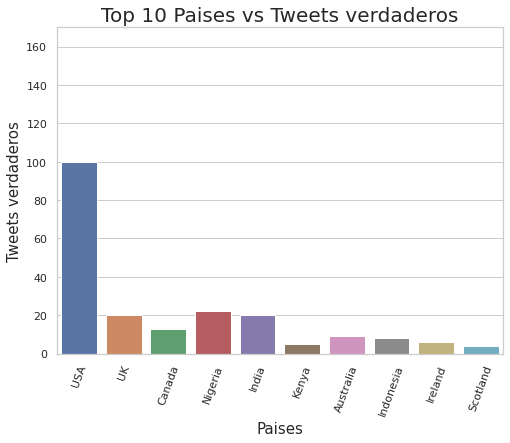

In [127]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_countries.index, y=top_10_countries[('target', 'sum')])
plt.ylim(0, 170)
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Tweets verdaderos", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Tweets verdaderos", fontsize=15)

In [128]:
top_10_countries['percentage'] = top_10_countries[('target', 'sum')]/top_10_countries[('target', 'count')]
top_10_countries

target       percentage
             sum count           
location                         
USA          100   163   0.613497
UK            20    41   0.487805
Canada        13    29   0.448276
Nigeria       22    28   0.785714
India         20    24   0.833333
Kenya          5    20   0.250000
Australia      9    18   0.500000
Indonesia      8    13   0.615385
Ireland        6    12   0.500000
Scotland       4     8   0.500000

Text(0, 0.5, 'Porcentaje tweets verdaderos')

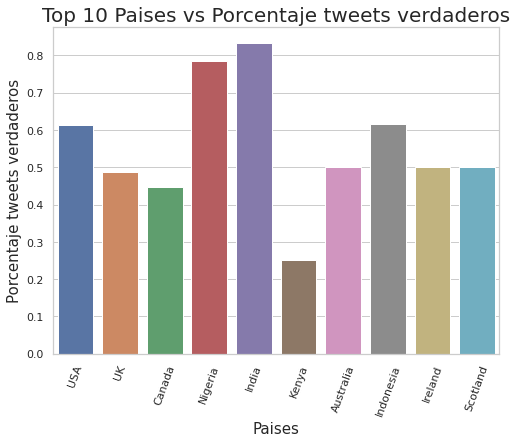

In [129]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_countries.index, y=top_10_countries['percentage'])
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Porcentaje tweets verdaderos", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Porcentaje tweets verdaderos", fontsize=15)

Agregamos estos datos para excluirlos en el próximo plot

In [130]:
countries.append('304')
countries.append('Worldwide')
countries

['USA',
 'Australia',
 'Canada',
 'India',
 'Indonesia',
 'Ireland',
 'Kenya',
 'Nigeria',
 'UK',
 'Scotland',
 'South Africa',
 '304',
 'Worldwide']

In [131]:
grouped_by_city = grouped_by_location.drop(countries, axis=0)
grouped_by_city[grouped_by_city[('target', 'count')] >= 10]

target      
                  sum count
location                   
Atlanta, GA         5    10
California         16    38
Chicago            13    30
Florida             3    14
London             23    66
Los Angeles        15    41
Mumbai             19    22
New York           34   118
Sacramento, CA      7    10
San Francisco      13    25
Seattle             7    18
Texas               3    10
Toronto             7    12
Washington, DC     24    35
ss                  1    10

In [132]:
top_10_cities = grouped_by_city.nlargest(10, ('target', 'count'))
top_10_cities

target      
                  sum count
location                   
New York           34   118
London             23    66
Los Angeles        15    41
California         16    38
Washington, DC     24    35
Chicago            13    30
San Francisco      13    25
Mumbai             19    22
Seattle             7    18
Florida             3    14

Text(0, 0.5, 'Total Tweets')

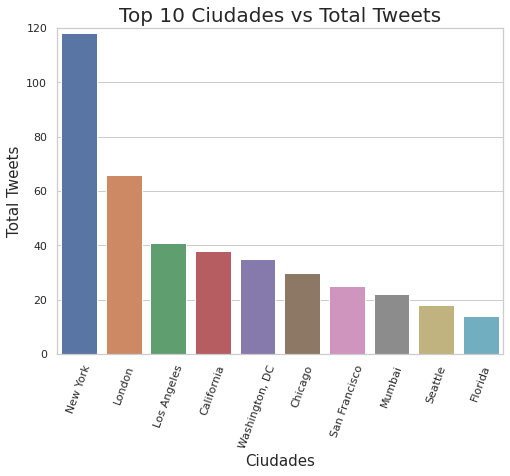

In [133]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_cities.index, y=top_10_cities[('target', 'count')])
plt.ylim(0, 120)
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Total Tweets", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Total Tweets", fontsize=15)

Text(0, 0.5, 'Tweets verdaderos')

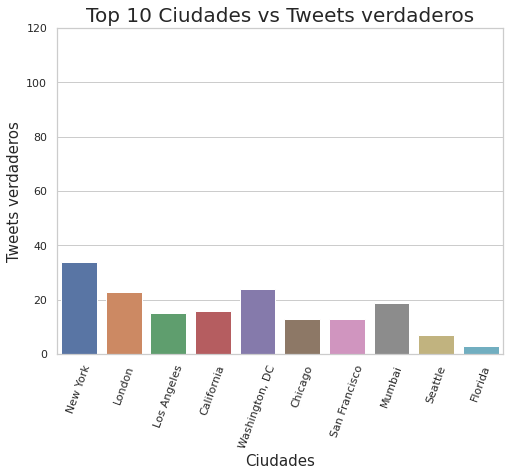

In [134]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_cities.index, y=top_10_cities[('target', 'sum')])
plt.ylim(0, 120)
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Tweets verdaderos", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Tweets verdaderos", fontsize=15)

In [135]:
top_10_cities['percentage'] = top_10_cities[('target', 'sum')]/top_10_cities[('target', 'count')]
top_10_cities

target       percentage
                  sum count           
location                              
New York           34   118   0.288136
London             23    66   0.348485
Los Angeles        15    41   0.365854
California         16    38   0.421053
Washington, DC     24    35   0.685714
Chicago            13    30   0.433333
San Francisco      13    25   0.520000
Mumbai             19    22   0.863636
Seattle             7    18   0.388889
Florida             3    14   0.214286

Text(0, 0.5, 'Porcentaje tweets verdaderos')

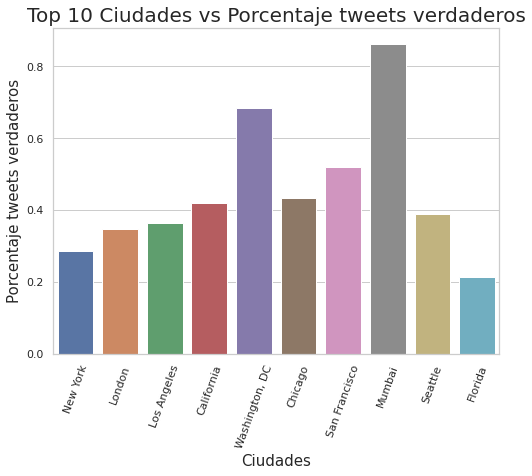

In [136]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_cities.index, y=top_10_cities['percentage'])
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Porcentaje tweets verdaderos", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Porcentaje tweets verdaderos", fontsize=15)

## Top 10 location vs len_text

In [137]:
countries = train[train['location'].isin(top_10_countries.index.tolist())]
countries

,id,keyword,location,text,len_text,target
51,74,ablaze,India,Man wife get six years jail for setting ablaze...,75,1
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,135,1
70,100,accident,UK,http://t.co/GKYe6gjTk5 Had a #personalinjury a...,129,0
73,105,accident,Australia,BigRigRadio Live Accident Awareness,35,1
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously die...,124,1
...,...,...,...,...,...,...
7479,10698,wreck,USA,@_PokemonCards_ @IceQueenFroslas why did they ...,84,0
7496,10723,wreck,USA,AmazonDeals: Skylanders Trap Team: Flip Wreck ...,130,0
7537,10776,wreckage,India,Wreckage 'Conclusively Confirmed' as From MH37...,60,1
7547,10788,wrecked,USA,I wonder how times someone has wrecked trying ...,100,0


Text(0, 0.5, 'Largo de tweets')

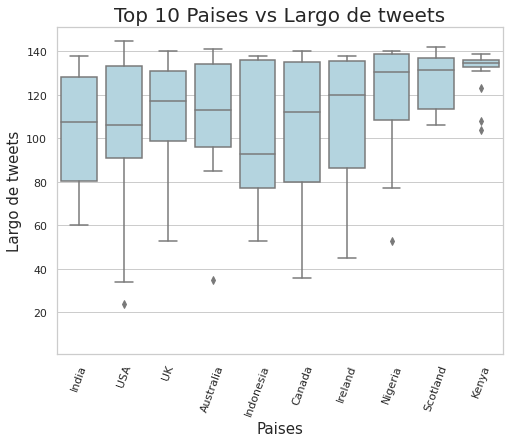

In [138]:
plt.figure(figsize=(8,6))
sb.boxplot(x="location", y="len_text", data=countries, color="lightblue")
plt.ylim(1,)
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Largo de tweets", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Largo de tweets", fontsize=15)

In [139]:
countries_true = countries[countries['target'] == 1]
countries_true

,id,keyword,location,text,len_text,target
51,74,ablaze,India,Man wife get six years jail for setting ablaze...,75,1
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,135,1
73,105,accident,Australia,BigRigRadio Live Accident Awareness,35,1
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously die...,124,1
148,212,airplane accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Fa...,95,1
...,...,...,...,...,...,...
7402,10590,wounded,USA,Gunmen open fire on bus near El Salvador's cap...,138,1
7413,10606,wounded,USA,One man fatally shot another wounded on Vermon...,88,1
7420,10613,wounded,USA,Police Officer Wounded Suspect Dead After Exch...,99,1
7430,10628,wounded,USA,ABC News: Police Officer Wounded Suspect Dead ...,105,1


Text(0, 0.5, 'Largo de tweets verdaderos')

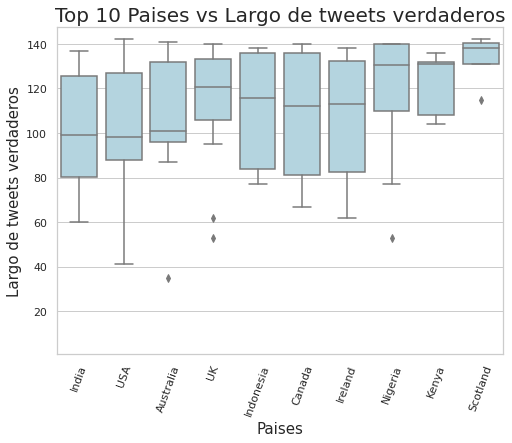

In [140]:
plt.figure(figsize=(8,6))
sb.boxplot(x="location", y="len_text", data=countries_true, color="lightblue")
plt.ylim(1,)
plt.xticks(rotation=70)
plt.title("Top 10 Paises vs Largo de tweets verdaderos", fontsize=20)
plt.xlabel("Paises", fontsize=15)
plt.ylabel("Largo de tweets verdaderos", fontsize=15)

In [141]:
cities = train[train['location'].isin(top_10_cities.index.tolist())]
cities

,id,keyword,location,text,len_text,target
35,53,ablaze,London,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,76,0
66,95,ablaze,San Francisco,@ablaze what time does your talk go until? I d...,85,0
167,242,airplane accident,San Francisco,Statistically I'm at more of risk of getting k...,104,0
169,244,airplane accident,New York,The shooting or the airplane accident https:/...,62,1
181,260,ambulance,Mumbai,If I get run over by an ambulance am I lucky? ...,72,0
...,...,...,...,...,...,...
7534,10772,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,136,1
7536,10775,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,136,1
7540,10780,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,136,1
7543,10784,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,136,1


Text(0, 0.5, 'Largo de tweets')

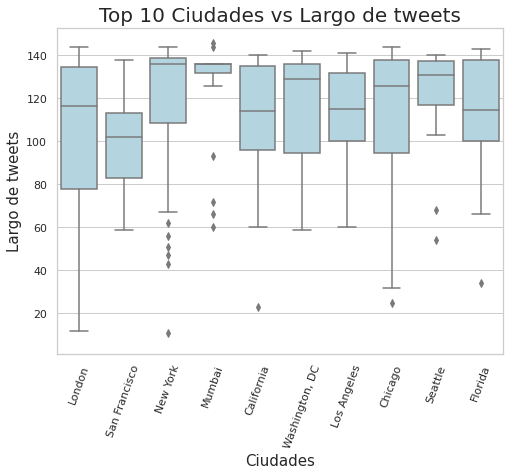

In [142]:
plt.figure(figsize=(8,6))
sb.boxplot(x="location", y="len_text", data=cities, color="lightblue")
plt.ylim(1,)
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Largo de tweets", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Largo de tweets", fontsize=15)

In [143]:
cities_true = cities[cities['target'] == 1]
cities_true

,id,keyword,location,text,len_text,target
169,244,airplane accident,New York,The shooting or the airplane accident https:/...,62,1
227,322,annihilated,London,During the 1960s the oryx a symbol of the Arab...,135,1
243,346,annihilation,California,@rvfriedmann Hell is just a fraction of his be...,120,1
317,462,armageddon,California,#PBBan (Temporary:300) hyider_ghost2 @'aRmaged...,98,1
434,630,arsonist,California,Alleged East Bay serial arsonist arrested #San...,80,1
...,...,...,...,...,...,...
7533,10771,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,60,1
7534,10772,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,136,1
7536,10775,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,136,1
7540,10780,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,136,1


Text(0, 0.5, 'Largo de tweets verdaderos')

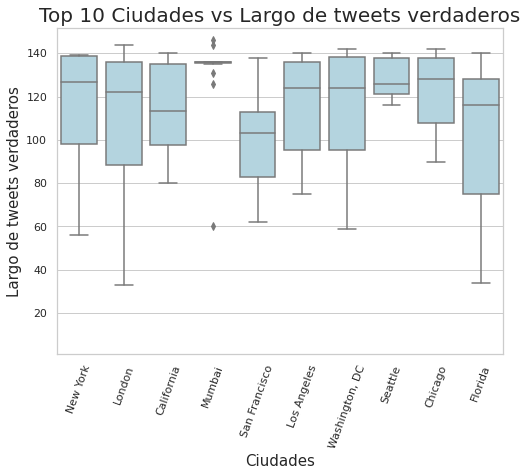

In [144]:
plt.figure(figsize=(8,6))
sb.boxplot(x="location", y="len_text", data=cities_true, color="lightblue")
plt.ylim(1,)
plt.xticks(rotation=70)
plt.title("Top 10 Ciudades vs Largo de tweets verdaderos", fontsize=20)
plt.xlabel("Ciudades", fontsize=15)
plt.ylabel("Largo de tweets verdaderos", fontsize=15)

### Top 10 keyword

Text(0, 0.5, 'Cantidad de Tweets')

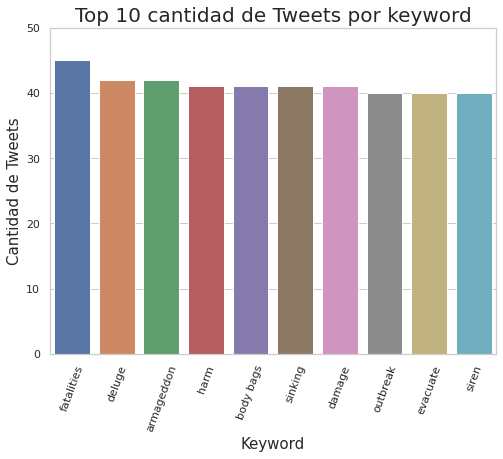

In [168]:
top_10_keyword = train['keyword'].value_counts().nlargest(10)
plt.figure(figsize=(8,6))
sb.barplot(x=top_10_keyword.index, y=top_10_keyword)
plt.ylim(0, 50)
plt.xticks(rotation=70)
plt.title("Top 10 cantidad de Tweets por keyword", fontsize=20)
plt.xlabel("Keyword", fontsize=15)
plt.ylabel("Cantidad de Tweets", fontsize=15)

In [146]:
grouped_by_keyword = train.groupby(['keyword']).agg({'target': ['sum', 'count']})
top_10_keyword_target = grouped_by_keyword['target'].nlargest(10, 'count')
top_10_keyword_target

,sum,count
keyword,,
fatalities,26,45
armageddon,5,42
deluge,6,42
body bags,1,41
damage,19,41
harm,4,41
sinking,8,41
collided,23,40
evacuate,25,40


Text(0, 0.5, 'Target')

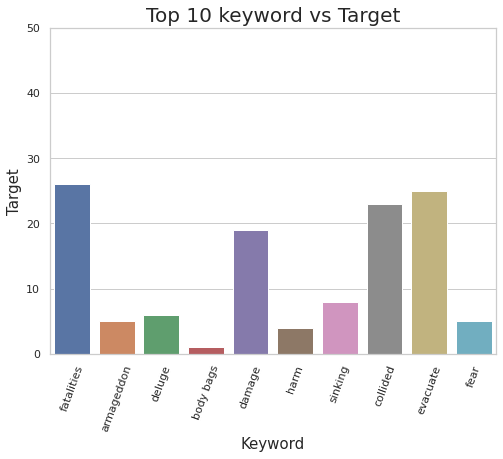

In [167]:
plt.figure(figsize=(8,6))
sb.barplot(x=top_10_keyword_target.index, y=top_10_keyword_target['sum'])
plt.ylim(0, 50)
plt.xticks(rotation=70)
plt.title("Top 10 keyword vs Target", fontsize=20)
plt.xlabel("Keyword", fontsize=15)
plt.ylabel("Target", fontsize=15)

Text(0, 0.5, 'Total Tweets')

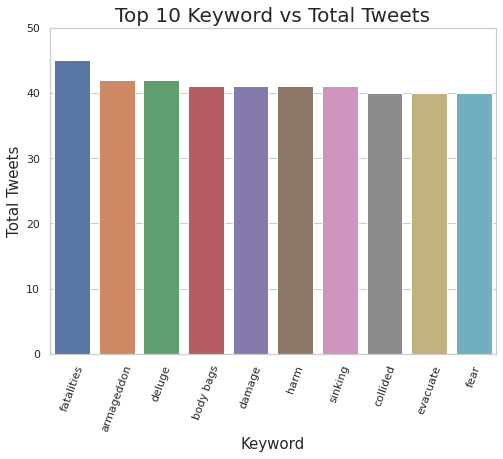

In [170]:
plt.figure(figsize=(8, 6))
sb.barplot(x=top_10_keyword_target.index, y=top_10_keyword_target['count'])
plt.ylim(0, 50)
plt.xticks(rotation=70)
plt.title("Top 10 Keyword vs Total Tweets", fontsize=20)
plt.xlabel("Keyword", fontsize=15)
plt.ylabel("Total Tweets", fontsize=15)

### Analizamos los location NaN

In [149]:
train['location'].isnull().value_counts()

False    5080
True     2533
Name: location, dtype: int64

Text(0, 0.5, 'Cantidad')

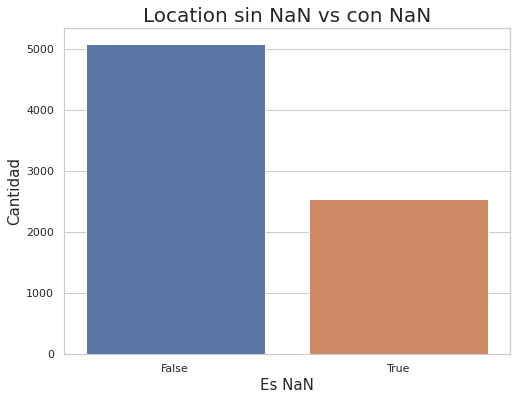

In [150]:
plt.figure(figsize=(8, 6))
sb.countplot(x=train['location'].isnull())
plt.title("Location sin NaN vs con NaN", fontsize=20)
plt.xlabel("Es NaN", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

In [151]:
location_null = train[train['location'].isnull()]
location_null

,id,keyword,location,text,len_text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,1
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,137,1


In [152]:
location_null['target'].value_counts()

0    1458
1    1075
Name: target, dtype: int64

Text(0, 0.5, 'Cantidad')

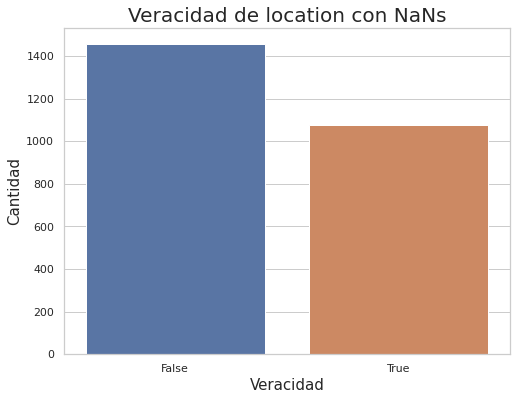

In [153]:
plt.figure(figsize=(8, 6))
sb.countplot(x=location_null['target'] == 1)
plt.title("Veracidad de location con NaNs", fontsize=20)
plt.xlabel("Veracidad", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

In [154]:
location_null['len_text'].value_counts()

136    137
137     71
139     69
138     65
135     59
      ... 
23       1
20       1
147      1
149      1
157      1
Name: len_text, Length: 146, dtype: int64

Text(0, 0.5, 'Largo de tweets')

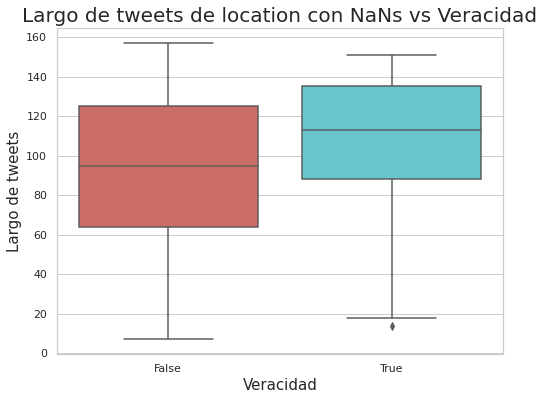

In [155]:
plt.figure(figsize=(8, 6))
sb.boxplot(x=location_null['target'] == 1, y=location_null['len_text'], palette='hls')
plt.title("Largo de tweets de location con NaNs vs Veracidad", fontsize=20)
plt.xlabel("Veracidad", fontsize=15)
plt.ylabel("Largo de tweets", fontsize=15)

In [156]:
location_null['keyword'].value_counts()

razed                  25
detonation             24
explosion              21
suicide bomber         20
thunder                19
                       ..
collision               3
snowstorm               3
epicentre               3
radiation emergency     3
threat                  1
Name: keyword, Length: 221, dtype: int64

In [157]:
location_null['keyword'].isnull().value_counts()

False    2472
True       61
Name: keyword, dtype: int64

Text(0, 0.5, 'Cantidad')

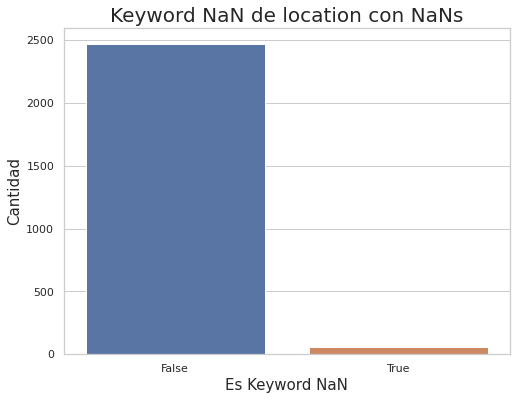

In [158]:
plt.figure(figsize=(8, 6))
sb.countplot(x=location_null['keyword'].isnull())
plt.title("Keyword NaN de location con NaNs", fontsize=20)
plt.xlabel("Es Keyword NaN", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)

Text(0, 0.5, 'Porcentaje')

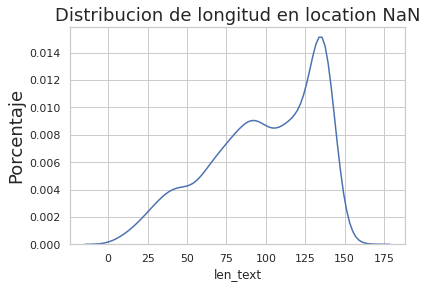

In [159]:
g1 = sb.distplot(location_null['len_text'], hist=False)
#g1 = sb.distplot(top_keyword[top_keyword['target'] == 0]['len_text'], color="red", label='len_text in target false', hist=False)
g1.set_title("Distribucion de longitud en location NaN", fontsize=18)
g1.set_ylabel("Porcentaje", fontsize=18)

In [160]:
train[train['keyword'].isnull() == True]['target'].value_counts()

1    42
0    19
Name: target, dtype: int64